In [67]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
BTC = pd.read_csv('btcdata.csv')

In [69]:
BTC.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 26, 2021","56,810.3","58,937.3","59,151.1","56,678.6",57.80K,-3.61%
1,"Nov 25, 2021","58,935.1","57,167.1","59,387.3","57,029.8",56.79K,3.08%
2,"Nov 24, 2021","57,171.7","57,559.4","57,697.4","55,910.6",56.68K,-0.70%
3,"Nov 23, 2021","57,573.2","56,304.8","57,855.1","55,542.5",72.48K,2.25%
4,"Nov 22, 2021","56,308.8","58,719.7","59,288.3","55,656.8",76.45K,-4.10%


In [70]:
BTC.tail()

,Date,Price,Open,High,Low,Vol.,Change %
691,"Jan 05, 2020","7,372.5","7,376.8","7,501.0","7,345.6",628.14K,-0.06%
692,"Jan 04, 2020","7,376.8","7,345.1","7,433.1","7,291.4",523.91K,0.46%
693,"Jan 03, 2020","7,343.1","6,967.1","7,402.9","6,884.1",936.29K,5.40%
694,"Jan 02, 2020","6,967.0","7,199.7","7,209.6","6,901.4",632.78K,-3.23%
695,"Jan 01, 2020","7,199.8","7,196.4","7,259.4","7,180.0",420.28K,0.05%


In [71]:
BTC['Price'] = BTC['Price'].str.replace(',', '')
BTC['Open'] = BTC['Open'].str.replace(',', '')
BTC['High'] = BTC['High'].str.replace(',', '')
BTC['Low'] = BTC['Low'].str.replace(',', '')
BTC['Vol.'] = BTC['Vol.'].str.replace('.', '')
BTC['Vol.'] = BTC['Vol.'].str.replace('K', '000')
BTC['Vol.'] = BTC['Vol.'].str.replace('M', '000000')
BTC['Change %'] = BTC['Change %'].str.replace('%', '')

In [72]:
BTC.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [73]:
BTC.drop('Date',axis=1,inplace=True)

In [74]:
X = BTC[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = BTC['Price']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm= LinearRegression()

In [82]:
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
#Intercept

print(lm.intercept_)

-32.67043023731094


In [86]:
#Coeff
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'] )
coeff_df

,Coefficients
Open,-9.784005e-02
High,6.166162e-01
Low,4.799555e-01
Vol.,4.685599e-08
Change %,9.966562e+01


In [87]:
predictions = lm.predict(X_test)

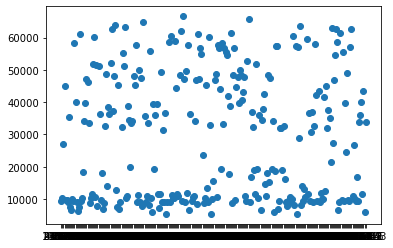

In [88]:
plt.scatter(y_test,predictions)

In [90]:
from sklearn import metrics

In [92]:
print('MAE:' , metrics.mean_absolute_error(y_test, predictions))
print('MSE:' , metrics.mean_squared_error(y_test, predictions))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 327.10250633041227
MSE: 228106.5406666407
RMSE: 477.6050048592882
